# Step1. 사진 모으기

변호윤 퍼실님께서 모아주신 파일 덕에 쉽게 사진을 모을 수 있었다.

# Step2. 얼굴 영역 자르기

[(170, 562, 491, 241)]


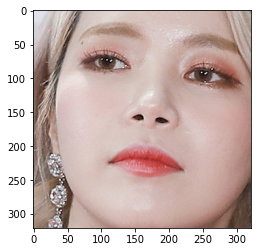

In [29]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/솔라.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   

[(337, 1224, 1136, 425)]


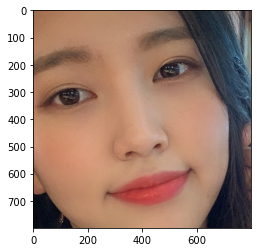

In [30]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/손송한3.JPG'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   

In [31]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0 : return []
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

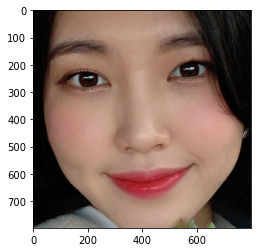

In [32]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/손송한1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

# Step3. 얼굴 영역의 임베딩 추출하기

In [33]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['심수창.jpeg', '로다주.jpeg', '김대중.jpg', '레오나르도 디카프리오.jpeg', '박진영.jpg', '조이.jpg', '차승원.jpg', '조승우.jpeg', '조정석.jpg', '승희.jpeg', '이희준.jpg', '장동건.jpeg', '이광수.jpg', '켄 정.jpeg', '아이린.jpeg', '박해일.jpeg', '무라니시.png', '박용택.jpg', '드웨인 존슨.jpg', '제프리 힌턴.jpg', '이제훈.jpeg', '유해진.jpg', '손송한1.jpg', '이근대위.jpeg', '아놀드 슈워제네거.jpg', '이승환.jpg', '태연.jpg', '장도연.jpg', '윤균상.jpg', '차명석.jpg', '이종석.jpeg', '트와이스다현.jpeg', '앤드류 응.png', '마동석.jpeg', '강미나.jpg', '다니엘 크레이그.jpeg', '길.jpg', '박나래.jpeg', '유아.jpg', '딕헌터.jpeg', '윤아.jpg', '문별.jpg', '트와이스사나.jpg', '제이홉.jpg', '트와이스쯔위.jpg', '슈가.jpg', '김C.jpeg', '조인성.jpg', '지드래곤.jpeg', '여자아이들수진.jpeg', '권태원.jpeg', '박보영.jpg', '세훈.jpg', '이범수.jpeg', '크리스 에반스.jpg', '최준석.jpg', '조원희.jpg', '아이즈원김채원.jpg', '노홍철.jpeg', '이대형.jpg', '방시혁.jpeg', '철면수심.jpg', '손흥민.jpg', '잇지유나.jpg', '채연.jpg', '서현진.jpg', '제니.jpg', '권현빈.jpg', '스윙스.jpeg', '숀 코네리.jpg', '유리.jpg', '사쿠라.jpg', '성시경.jpg', '클린트 이스트우드.jpg', '크리스 햄스워스.jpg', '러블리즈지수.jpeg', '공효진.jpg', '이진호.jpeg', '이성민.jpg', '최민식.jpg', '이영하.jpg', '이안 굿펠로우.jpg',

In [34]:
image_file = os.path.join(dir_path, '솔라.jpg')
face = get_gropped_face(image_file)   

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.11611858,  0.09680796,  0.05414825, -0.13819852, -0.0996763 ,
        -0.06486122, -0.11354907, -0.06375778,  0.1945135 , -0.17366713,
         0.23964366, -0.12292905, -0.19784103,  0.02584339,  0.03605783,
         0.1913273 , -0.20803162, -0.09583461, -0.0364862 ,  0.0174202 ,
         0.10081605,  0.05231626,  0.01147156,  0.03240613, -0.14166076,
        -0.3798514 , -0.13894106, -0.04606603, -0.01730431, -0.03762778,
         0.0023915 ,  0.03836724, -0.19062927, -0.02088338,  0.00933131,
         0.17429408, -0.02655165, -0.06727159,  0.13378711, -0.01714559,
        -0.31222695,  0.00491658,  0.06067458,  0.24787295,  0.17006105,
         0.05385127, -0.02359219, -0.09414117,  0.06542117, -0.1749638 ,
         0.03444561,  0.1051622 ,  0.04585684,  0.04675151,  0.07931791,
        -0.09021671,  0.10219938,  0.1347391 , -0.23312621, -0.07937421,
         0.13591112, -0.094607  ,  0.06177058, -0.08610609,  0.29401422,
         0.08646888, -0.11302091, -0.16873075,  0.1

In [35]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:          
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [36]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['손송한1']

array([-0.09897975,  0.0337561 ,  0.08855944, -0.08816551, -0.13713731,
       -0.0558412 , -0.11188892, -0.06757534,  0.12863861, -0.18740888,
        0.20735298, -0.11190122, -0.21287122, -0.00599786, -0.05296655,
        0.22969352, -0.15954715, -0.13226987, -0.00558431,  0.03313576,
        0.11646006,  0.10379113, -0.02910561,  0.04863058, -0.15437962,
       -0.35848448, -0.1021202 , -0.04750356, -0.11183454, -0.06933405,
       -0.04035627,  0.07403948, -0.13992551,  0.00732697,  0.00916191,
        0.12093225,  0.00552083, -0.08264172,  0.10512671,  0.01599596,
       -0.3715634 ,  0.04657821,  0.09213373,  0.22453514,  0.14397672,
       -0.0141876 ,  0.02268557, -0.13037692,  0.06683397, -0.1624777 ,
        0.02600537,  0.09642251,  0.08373139,  0.03266085,  0.03695079,
       -0.11655165,  0.02237259,  0.11181635, -0.12077988, -0.00809611,
        0.11927874, -0.09029138,  0.06099885, -0.07568993,  0.18815625,
        0.05599665, -0.10654438, -0.17715688,  0.1073581 , -0.15

# + 거리 구해보기

In [37]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('손송한1', '솔라')

0.4353545408075485

# Step4. 모은 연예인들과 비교하기

In [38]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('손송한1')   

In [39]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('손송한1',
  array([-0.09897975,  0.0337561 ,  0.08855944, -0.08816551, -0.13713731,
         -0.0558412 , -0.11188892, -0.06757534,  0.12863861, -0.18740888,
          0.20735298, -0.11190122, -0.21287122, -0.00599786, -0.05296655,
          0.22969352, -0.15954715, -0.13226987, -0.00558431,  0.03313576,
          0.11646006,  0.10379113, -0.02910561,  0.04863058, -0.15437962,
         -0.35848448, -0.1021202 , -0.04750356, -0.11183454, -0.06933405,
         -0.04035627,  0.07403948, -0.13992551,  0.00732697,  0.00916191,
          0.12093225,  0.00552083, -0.08264172,  0.10512671,  0.01599596,
         -0.3715634 ,  0.04657821,  0.09213373,  0.22453514,  0.14397672,
         -0.0141876 ,  0.02268557, -0.13037692,  0.06683397, -0.1624777 ,
          0.02600537,  0.09642251,  0.08373139,  0.03266085,  0.03695079,
         -0.11655165,  0.02237259,  0.11181635, -0.12077988, -0.00809611,
          0.11927874, -0.09029138,  0.06099885, -0.07568993,  0.18815625,
          0.05599665, -0.106

In [40]:
def get_nearest_face(name, top=40):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [41]:
get_nearest_face('손송한1')

순위 1 : 이름(손송한3), 거리(0.2684805367127824)
순위 2 : 이름(아이유), 거리(0.3648964875626607)
순위 3 : 이름(우기), 거리(0.36716164540866325)
순위 4 : 이름(러블리즈지수), 거리(0.36775540007940216)
순위 5 : 이름(태연), 거리(0.36801428976743494)
순위 6 : 이름(사쿠라), 거리(0.36994660379482946)
순위 7 : 이름(제니), 거리(0.37473115906795823)
순위 8 : 이름(아이즈원조유리), 거리(0.37784843927299167)
순위 9 : 이름(승희), 거리(0.38794842358836945)
순위 10 : 이름(트와이스미나), 거리(0.393288363580706)
순위 11 : 이름(수지), 거리(0.39613728547999133)
순위 12 : 이름(지호), 거리(0.39660108731898425)
순위 13 : 이름(리아), 거리(0.4009512558157756)
순위 14 : 이름(케이), 거리(0.40197303538559936)
순위 15 : 이름(김고은), 거리(0.4026355983768391)
순위 16 : 이름(강미나), 거리(0.41044682173960567)
순위 17 : 이름(트와이스사나), 거리(0.4107613393542862)
순위 18 : 이름(아린), 거리(0.4110087252492232)
순위 19 : 이름(트와이스나연), 거리(0.41630660551929205)
순위 20 : 이름(채연), 거리(0.41871770634877786)
순위 21 : 이름(조이), 거리(0.4241365232118288)
순위 22 : 이름(잇지예지), 거리(0.4244473401353004)
순위 23 : 이름(문별), 거리(0.4276257954710488)
순위 24 : 이름(유아), 거리(0.4276861831559053)
순위 25 : 이름(장원영), 거리(0.4286951045

## 동일 인물의 사진이 1순위로 비슷하다는 결과가 나왔다. 꽤나 정확한 편인거 같다. 다만, 동일 인물의 사진을 총 3장 준비했는데 2번 사진을 recognition을 하면 눈동자만 crop이 된다. 이유를 모르겠다.